In [17]:
import csv
import matplotlib.pyplot as plt
import numpy as np

In [68]:
data_imagenet = []

with open('CLIP-results/resnet18_25_07_16_18_08/descriptions.csv', newline='', encoding='utf-8') as csvfile:
    reader = csv.reader(csvfile)
    next(reader)
    for row in reader:
        data_imagenet.append(tuple(row))

In [ ]:
data_places = []

with open('CLIP-results/resnet18_places_25_07_16_17_57/descriptions.csv', newline='', encoding='utf-8') as csvfile:
    reader = csv.reader(csvfile)
    next(reader)
    for row in reader:
        data_places.append(tuple(row))

: 

In [27]:
concepts_imagenet_all = [x[2] for x in data_imagenet]
concepts_imagenet_l2 = [x[2] for x in data_imagenet if x[0] == 'layer2']
concepts_imagenet_l3 = [x[2] for x in data_imagenet if x[0] == 'layer3']
concepts_imagenet_l4 = [x[2] for x in data_imagenet if x[0] == 'layer4']
ds_conc_imagenet = [concepts_imagenet_all, 0, concepts_imagenet_l2, concepts_imagenet_l3, concepts_imagenet_l4]

concepts_places_all = [x[2] for x in data_places]
concepts_places_l2 = [x[2] for x in data_places if x[0] == 'layer2']
concepts_places_l3 = [x[2] for x in data_places if x[0] == 'layer3']
concepts_places_l4 = [x[2] for x in data_places if x[0] == 'layer4']
ds_conc_places = [concepts_places_all, 0, concepts_places_l2, concepts_places_l3, concepts_places_l4]

In [58]:
print('Concepts learned on ImageNet:')
print('Overall:', len(set(concepts_imagenet_all)))
print('Layer 2:', len(set(concepts_imagenet_l2)))
print('Layer 3:', len(set(concepts_imagenet_l3)))
print('Layer 4:', len(set(concepts_imagenet_l4)))
print()
print('Concepts learned on Places 365:')
print('Overall:', len(set(concepts_places_all)))
print('Layer 2:', len(set(concepts_places_l2)))
print('Layer 3:', len(set(concepts_places_l3)))
print('Layer 4:', len(set(concepts_places_l4)))

Concepts learned on ImageNet:
Overall: 374
Layer 2: 68
Layer 3: 124
Layer 4: 278

Concepts learned on Places 365:
Overall: 428
Layer 2: 66
Layer 3: 135
Layer 4: 314


In [32]:
conc_comb_all = list(set(concepts_places_all).union(set(concepts_imagenet_all)))
conc_comb_l2 = list(set(concepts_places_l2).union(set(concepts_imagenet_l2)))
conc_comb_l3 = list(set(concepts_places_l3).union((concepts_imagenet_l3)))
conc_comb_l4 = list(set(concepts_places_l4).union((concepts_imagenet_l4)))

ds_conc_comb = [conc_comb_all, 0, conc_comb_l2, conc_comb_l3, conc_comb_l4]


In [35]:
ds_conc_comb[1]

0

In [63]:
def plot_layer(layer, ignore=0):
    amount_imagenet = [0] * len(ds_conc_comb[layer])
    for i in ds_conc_imagenet[layer]:
        amount_imagenet[ds_conc_comb[layer].index(i)] += 1

    amount_places = [0] * len(ds_conc_comb[layer])
    for i in ds_conc_places[layer]:
        amount_places[ds_conc_comb[layer].index(i)] += 1

    labels = ds_conc_comb[layer].copy()
    remove = []
    for i in range(len(labels)):
        if (amount_imagenet[i] <= ignore) and (amount_places[i] <= ignore):
            remove.append(i)

    for i in remove[::-1]:
        labels.pop(i)
        amount_imagenet.pop(i)
        amount_places.pop(i)


    # Number of labels
    y_pos = np.arange(len(labels))
    bar_height = 0.35  # Controls bar thickness and spacing

    # Create horizontal bar chart
    plt.figure(figsize=(5, max(5, 0.5*len(labels))))

    # Bars for first dataset
    plt.barh(y_pos - bar_height/2, amount_imagenet, height=bar_height, label='ImageNet', color='skyblue')

    # Bars for second dataset
    plt.barh(y_pos + bar_height/2, amount_places, height=bar_height, label='Places 365', color='orange')

    # Set y-axis labels
    plt.yticks(y_pos, labels)

    # Add labels and legend
    plt.xlabel('Number of Units that learned the Concept')
    plt.title(f'Learned Concepte in Layer {layer}')
    plt.legend()

    # Optional: grid for better readability
    plt.grid(axis='x', linestyle='--', alpha=0.7)

    # Show plot
    plt.tight_layout()
    plt.show()



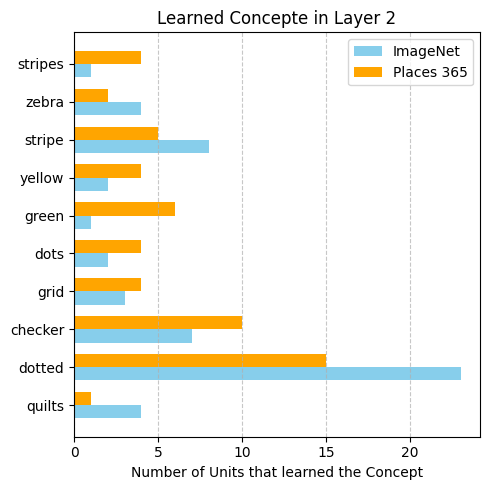

In [64]:
plot_layer(2,3)

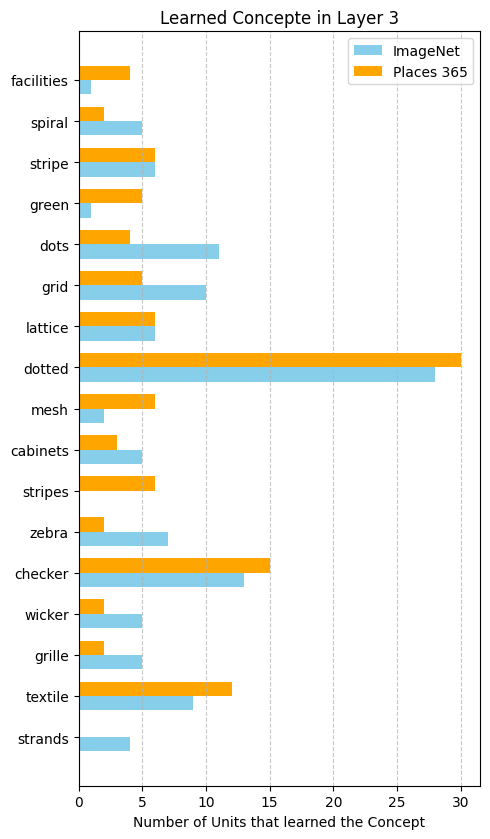

In [65]:
plot_layer(3,3)

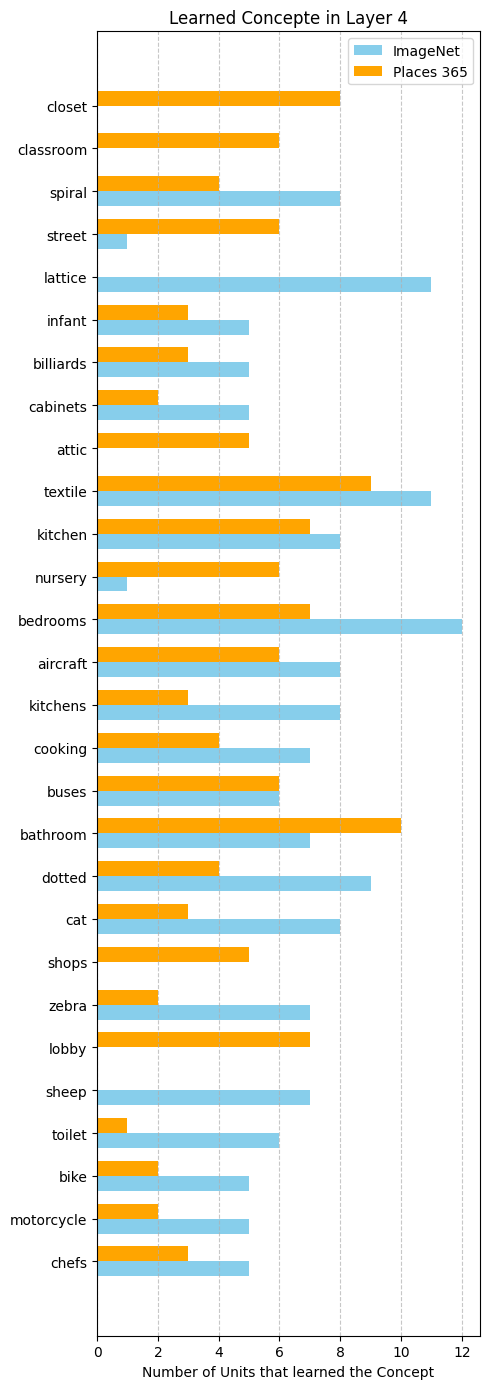

In [67]:
plot_layer(4,4)